### Importing Libraries

In [106]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

&nbsp;

### Loading Dataset

In [115]:
path = os.getcwd()+"/tennis.csv"
df = pd.read_csv(path)
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


&nbsp;

### Descriptive Analaysis

In [108]:
print(df.info())
print('\nMissing Records in data :')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play        14 non-null object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes
None

Missing Records in data :
outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64


&nbsp;

### Dummy Variables Creation(<span style='background:yellow'>Instead of direct categorical variable, sklearn library works with encoded category variables to find Entropy and I.G for best splits</span>)

In [109]:
df_getdummy=pd.get_dummies(data=df, columns=['outlook', 'temp', 'humidity', 'windy'])
df_getdummy

,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,0,0,1,0,1,0,1,0,1,0
1,no,0,0,1,0,1,0,1,0,0,1
2,yes,1,0,0,0,1,0,1,0,1,0
3,yes,0,1,0,0,0,1,1,0,1,0
4,yes,0,1,0,1,0,0,0,1,1,0
5,no,0,1,0,1,0,0,0,1,0,1
6,yes,1,0,0,1,0,0,0,1,0,1
7,no,0,0,1,0,0,1,1,0,1,0
8,yes,0,0,1,1,0,0,0,1,1,0
9,yes,0,1,0,0,0,1,0,1,1,0


&nbsp;

### Model Training

In [110]:
X = df_getdummy.drop('play',axis=1)
y = df_getdummy['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0) #criterion='gini'(default)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

&nbsp;

### Trained Decision Tree Visualization

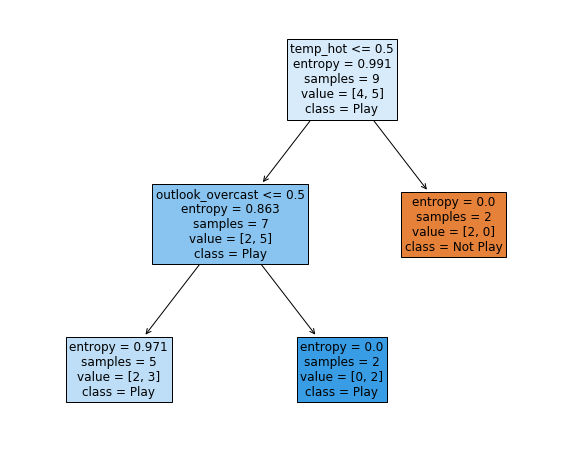

In [111]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, class_names=['Not Play', 'Play'])#Because in our data 1st class label is not play in resp. variable
plt.show()

#### Key Point :
> * Node colour get assigned as per each class label. i.e., orange - not play class, blue - play class. 
> * Higher the class label counts and then colour would be dominating class label one for node.
> * more pure/dominating node with labels more thicker the colour
> * Node with same proportion of labels count, then by default colour of the node would be white.

&nbsp;

### Model Performance
> * Accuracy = (TP + TN) / (Total number of observation)
> * Accuracy = The number of correct predictions made divided by the total number of predictions made.

In [112]:
print("X_train sample counts : {}".format(len(X_train)))
print("y_test sample counts : {}\n".format(len(X_test)))

y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print('Accuracy: {:.2f}'.format(accuracy))

X_train sample counts : 9
y_test sample counts : 5

Misclassified samples: 3
Accuracy: 0.40


&nbsp;

### Take Away Points :
> * Due to very less data points in X_train, our trained decision tree model doesn't performed well, even if we increased or decreased depth of the tree(i.e., hyperparameter).
> * Having more data in train dataset can make decision tree get trained with all cases covered and can make decisions on test data set cases accurately.